In [2]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [247]:
df = pd.read_csv("kc_house_data_train.csv", index_col=0)

In [244]:
df.shape

(17290, 21)

In [245]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

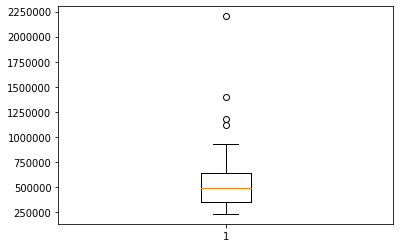

In [5]:
plt.boxplot(df.groupby('zipcode').price.mean());

In [6]:
df[['zipcode', 'lat', 'long']].corr()

,zipcode,lat,long
zipcode,1.000000,0.264712,-0.563027
lat,0.264712,1.000000,-0.131514
long,-0.563027,-0.131514,1.000000


In [7]:
df.sort_values(by='sqft_lot', ascending=False)[:15]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
718,718,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
11616,11616,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
13460,13460,2623069031,20140521T000000,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
16243,16243,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
13543,13543,722069232,20140905T000000,998000.0,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
2296,2296,3626079040,20140730T000000,790000.0,2,3.00,2560,982278,1.0,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946
16269,16269,2624089007,20150320T000000,1998000.0,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
397,397,2724079090,20150105T000000,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384
4666,4666,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132
2705,2705,2522029039,20140929T000000,550000.0,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992


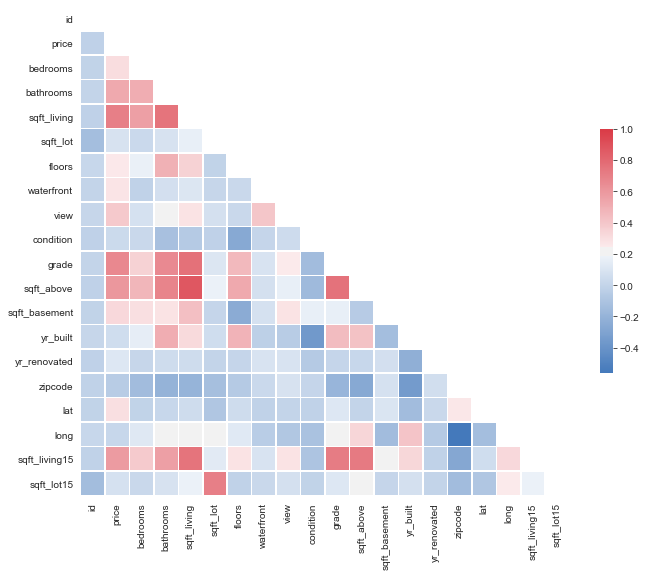

In [248]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

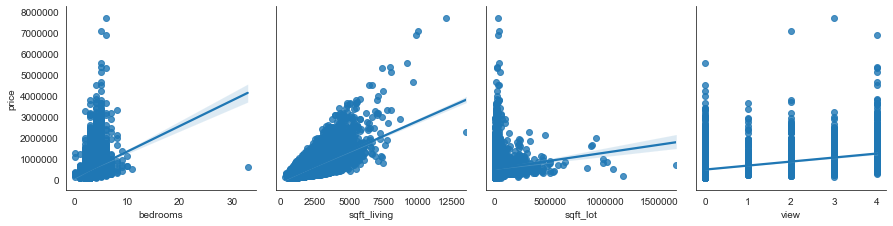

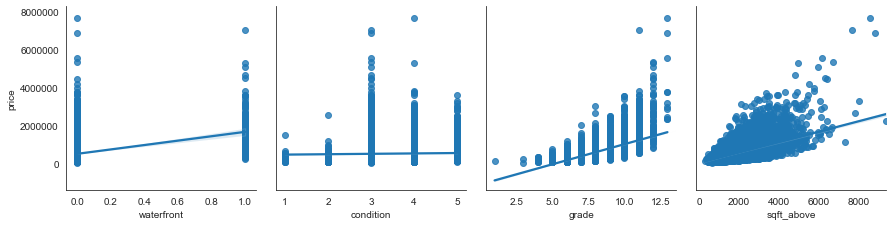

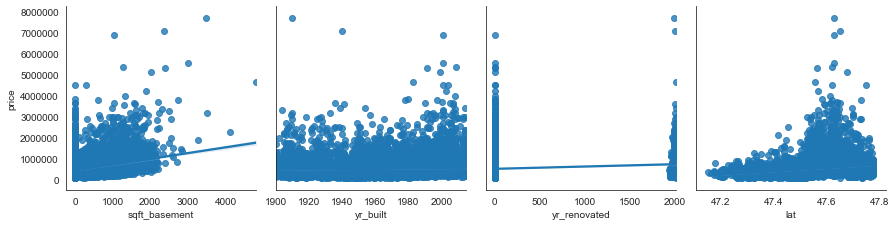

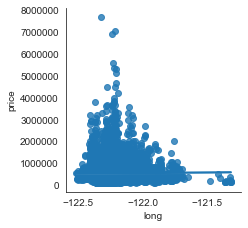

In [249]:
features = ['bedrooms', 'sqft_living', 'sqft_lot', 'view', 'waterfront',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [10]:
ols('price~bedrooms+bathrooms+ sqft_living+ waterfront+ view+condition+grade+sqft_above+ sqft_basement+yr_built+ yr_renovated+ lat+sqft_living15+ sqft_lot15',data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2995.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:02:17   Log-Likelihood:            -2.3617e+05
No. Observations:               17290   AIC:                         4.724e+05
Df Residuals:                   17276   BIC:                         4.725e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.224e+07   6.17e+05    -36.019      0.000   -2.34e+07    -2.1e+07
bedrooms      -3.512e+04   2131.067    -16.479      0.000   -3.93e+04   -3.09e+04
bathrooms      4.376e+04   3607.207     12.130      0.000    3.67e+04    5.08e+04
sqft_living     112.7415      2.579     43.721      0.000     107.687     117.796
waterfront     6.009e+05   1.95e+04     30.856      0.000    5.63e+05    6.39e+05
view           5.122e+04   2413.772     21.222      0.000    4.65e+04     5.6e+04
condition      2.908e+04   2665.693     10.910      0.000    2.39e+04    3.43e+04
grade          1.004e+05   2436.975     41.183      0.000    9.56e+04    1.05e+05
sqft_above       70.1471      2.376     29.521      0.000      65.490      74.805
sqft_basement    42.5949      2.743     15.526      0.000      37.218      47.972
yr_built      -2725.5731     77.092    -35.355      0.000   -2876.681   -2574.465
yr_renovated     16.7689      4.200      3.992      0.000       8.536      25.002
lat            5.653e+05    1.2e+04     47.292      0.000    5.42e+05    5.89e+05
sqft_living15    19.0926      3.813      5.007      0.000      11.619      26.566
sqft_lot15       -0.3347      0.060     -5.591      0.000      -0.452      -0.217
==============================================================================
Omnibus:                    15484.630   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1745266.499
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      51.612   Cond. No.                     1.24e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
df.sqft_lot.describe()

count    1.729000e+04
mean     1.524340e+04
std      4.230462e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [5]:
# max_bed = df[df['bedrooms']<30].bedrooms.max()
# max_sqft_living = df[df['sqft_living']<13500].sqft_living.max()
# max_sqft_lot = df[df['sqft_lot']<1500000].sqft_lot.max()

In [6]:
# df["bedrooms"] = df["bedrooms"].mask(df["bedrooms"] >30, max_bed)
# df["sqft_living"] = df["sqft_living"].mask(df["sqft_living"] >13500, max_sqft_living)
# df["sqft_lot"] = df["sqft_lot"].mask(df["sqft_lot"] >1500000, max_sqft_lot)

In [59]:
df.shape

(17290, 22)

In [250]:
# Dropping outlier in bedrooms and sqft_living
df = df[df['bedrooms']<30]
df = df[df['sqft_living']<13500]
df = df[df['sqft_lot']<1500000]

In [251]:
df['yr_built_categories'] = df['yr_built'].apply(lambda x: 'oldest' if x<1951 
                                                 else('old' if 1951<=x<1974 
                                                      else('new' if 1974<=x<1996 else 'newest')))

In [252]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 'yes' if x>1 else 'no')

In [253]:
age_dummy = pd.get_dummies(df.yr_built_categories, prefix='age')
water_dummy = pd.get_dummies(df.waterfront, prefix='water')
renovated_dummy = pd.get_dummies(df.renovated, prefix='renovated')
zipcode_dummy = pd.get_dummies(df.zipcode, prefix='zip')
condition_dummy = pd.get_dummies(df.condition, prefix='condition')
view_dummy = pd.get_dummies(df.view, prefix='view')
bedrooms_dummy = pd.get_dummies(df.bedrooms, prefix='bedrooms')
df = pd.concat([df, age_dummy, water_dummy, renovated_dummy, zipcode_dummy, condition_dummy, view_dummy, bedrooms_dummy], axis=1)

In [254]:
grade_dummy = pd.get_dummies(df.grade, prefix='grade')
df= pd.concat([df, grade_dummy], axis =1)

In [255]:
df['grade_sq'] = np.sqrt(df['grade'])

df['view_sq'] = np.sqrt(df['view'])
df['bedrooms_sq'] = np.sqrt(df['bedrooms'])

In [256]:
#LOG TRANSFORMATIONS
df['sqft_living_log'] = df['sqft_living'].map(lambda x: np.log(x))
df['sqft_above_log'] = df['sqft_above'].map(lambda x: np.log(x))
df['sqft_lot_log'] = df['sqft_lot'].map(lambda x: np.log(x))
df['yr_built_log'] = df['yr_built'].map(lambda x: np.log(x))
# df['grade_log'] = df['grade'].map(lambda x: np.log(x))

In [257]:
#interactions:
df['sqft_living_above'] = df['sqft_living'] * df['sqft_above']
df['sqft_basement_living'] = df['sqft_basement'] * df['sqft_living']

In [258]:
columns = list(df)
cols_zipcode= []
for x in range(0,len(columns)):
    if 'zip_' in columns[x]:
        cols_zipcode.append(columns[x+1])
        
len(cols_zipcode)

70

In [259]:
columns = list(df)
cols_bedrooms= []
for x in range(0,len(columns)):
    if 'bedrooms_' in columns[x]:
        cols_bedrooms.append(columns[x+1])
        
cols_bedrooms

['bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'grade_1',
 'sqft_living_log']

In [260]:
columns = list(df)
cols_grade= []
for x in range(0,len(columns)):
    if 'grade_' in columns[x]:
        cols_grade.append(columns[x])
cols_grade

['grade_1',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_sq']

In [261]:
columns = list(df)
cols_condition= []
for x in range(0,len(columns)):
    if 'condition_' in columns[x]:
        cols_condition.append(columns[x])

In [91]:
df.shape

(17287, 136)

In [262]:
subsets=[
          'sqft_living_above', 'water_1', 'view', 'sqft_basement_living', 'age_new',
          'age_newest', 'age_old', 'grade_sq', 'bedrooms_sq', 'bathrooms'
        ]
features = subsets +cols_condition[1:]+ cols_zipcode[1:]
df_features = df[features]
target = df['price']

In [246]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [263]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.20)

In [264]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [267]:
#instantiate a linear regression object
lm = LinearRegression()
#fit the linear regression to the data
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", lm.score(X_train, y_train))

Training Root Mean Squared Error: 153224.17271622986
R^2 Score: 0.831785469518521


In [268]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 147485.74120128693
Training:  153224 vs. Testing:  147485


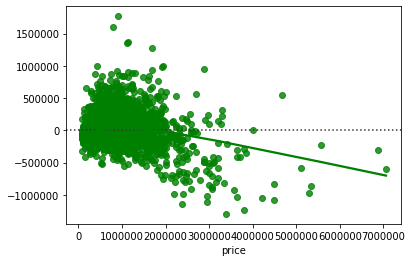

In [214]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

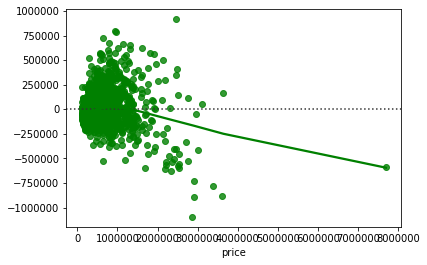

In [215]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [33]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [34]:
len(X_train.columns)

104

In [35]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False);
X_test.drop(columns=to_drop, inplace=False);



In [36]:
to_drop

[]

In [269]:
import pickle
filename = 'final_model_DRKH.sav'
pickle.dump(lm, open(filename, 'wb'))

In [171]:
df.head(2)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_categories,renovated,age_new,age_newest,age_old,age_oldest,water_0,water_1,renovated_no,renovated_yes,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,grade_sq,view_sq,bedrooms_sq,sqft_living_log,sqft_above_log,sqft_lot_log,yr_built_log
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,new,no,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.828427,0.0,2.000000,7.635304,7.635304,9.09302,7.593878
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,new,no,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.828427,0.0,2.236068,7.972466,7.512071,8.81433,7.589336


In [270]:
import pickle
filename = 'final_scaler_DRKH.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
ols('price~sqft_living_above+water_1+view=sqft_basement_living', 'age_new',
          'age_newest', 'age_old','renovated_yes', 'grade_sq', 'bedrooms_sq', 'bathrooms')

In [218]:
outcome = 'price'
x_cols = ['sqft_living_above', 'water_1', 'view', 'sqft_basement_living', 'age_new',
          'age_newest', 'age_old','renovated_yes', 'grade_sq', 'bedrooms_sq', 'bathrooms']
feature=x_cols + cols_condition[1:]+ cols_zipcode[1:]
predictors = '+'.join(feature)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:23   Log-Likelihood:            -2.3077e+05
No. Observations:               17287   AIC:                         4.617e+05
Df Residuals:                   17203   BIC:                         4.624e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.208e+05   2.18e+04    -23.886      0.000   -5.64e+05   -4.78e+05
sqft_living_above        0.0379      0.000     86.347      0.000       0.037       0.039
water_1               6.223e+05   1.45e+04     42.774      0.000    5.94e+05    6.51e+05
view                  5.407e+04   1814.691     29.797      0.000    5.05e+04    5.76e+04
sqft_basement_living     0.0245      0.001     27.797      0.000       0.023       0.026
age_new              -5.189e+04   4837.578    -10.726      0.000   -6.14e+04   -4.24e+04
age_newest           -6.281e+04   5197.671    -12.083      0.000    -7.3e+04   -5.26e+04
age_old               -3.71e+04   3981.146     -9.320      0.000   -4.49e+04   -2.93e+04
renovated_yes         3.505e+04   6219.744      5.635      0.000    2.29e+04    4.72e+04
grade_sq              3.205e+05   9699.930     33.041      0.000    3.01e+05     3.4e+05
bedrooms_sq          -4.721e+04   5774.036     -8.177      0.000   -5.85e+04   -3.59e+04
bathrooms             1.243e+04   2680.480      4.638      0.000    7177.916    1.77e+04
condition_2          -1.149e+05   1.27e+04     -9.057      0.000    -1.4e+05      -9e+04
condition_3          -1.131e+05   7694.066    -14.702      0.000   -1.28e+05    -9.8e+04
condition_4          -8.933e+04   7690.351    -11.616      0.000   -1.04e+05   -7.43e+04
condition_5          -4.309e+04   8246.922     -5.225      0.000   -5.93e+04   -2.69e+04
zip_98003            -2.185e+04   1.25e+04     -1.743      0.081   -4.64e+04    2720.425
zip_98004             7.742e+05   1.25e+04     61.924      0.000     7.5e+05    7.99e+05
zip_98005             3.051e+05    1.5e+04     20.398      0.000    2.76e+05    3.34e+05
zip_98006             2.535e+05   1.09e+04     23.344      0.000    2.32e+05    2.75e+05
zip_98007               2.5e+05   1.57e+04     15.957      0.000    2.19e+05    2.81e+05
zip_98008             2.492e+05   1.26e+04     19.801      0.000    2.24e+05    2.74e+05
zip_98010             6.381e+04   1.91e+04      3.334      0.001    2.63e+04    1.01e+05
zip_98011             1.314e+05    1.4e+04      9.382      0.000    1.04e+05    1.59e+05
zip_98014              9.92e+04   1.68e+04      5.889      0.000    6.62e+04    1.32e+05
zip_98019             8.986e+04   1.46e+04      6.143      0.000    6.12e+04    1.19e+05
zip_98022            -9416.0481   1.33e+04     -0.707      0.479   -3.55e+04    1.67e+04
zip_98023            -3.491e+04   1.05e+04     -3.322      0.001   -5.55e+04   -1.43e+04
zip_98024             1.604e+05   2.03e+04      7.909      0.000    1.21e+05       2e+05
zip_98027             1.583e+05   1.11e+04     14.206      0.000    1.36e+05     1.8e+05
zip_98028             1.251e+05   1.26e+04      9.914      0.000       1e+05     1.5e+05
zip_98029             2.031e+05   1.22e+04     16.648    

In [272]:
df_features.describe()

,sqft_living_above,water_1,view,sqft_basement_living,age_new,age_newest,age_old,grade_sq,bedrooms_sq,bathrooms,condition_2,condition_3,condition_4,condition_5,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,condition_1
count,1.728700e+04,17287.000000,17287.000000,1.728700e+04,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000
mean,4.386401e+06,0.007983,0.238156,7.825232e+05,0.248973,0.256956,0.253717,2.758757,1.818384,2.111688,0.008041,0.650373,0.261179,0.079019,0.012958,0.013710,0.008099,0.022271,0.007057,0.013073,0.004281,0.009429,0.005843,0.008388,0.010875,0.023717,0.003760,0.019205,0.012668,0.014462,0.011627,0.012437,0.005958,0.020536,0.025163,0.026320,0.002430,0.013247,0.024469,0.010181,0.027419,0.018685,0.012148,0.019437,0.022271,0.021577,0.014404,0.005727,0.012437,0.020709,0.016544,0.009371,0.016544,0.004628,0.026610,0.009834,0.015387,0.012264,0.008735,0.004917,0.012495,0.026899,0.015387,0.025279,0.023717,0.008619,0.013594,0.018569,0.016081,0.023139,0.012379,0.015561,0.014230,0.002487,0.020246,0.012090,0.012437,0.012611,0.012437,0.006305,0.012726,0.015387,0.001388
std,4.488553e+06,0.088992,0.774481,1.621610e+06,0.432431,0.436968,0.435150,0.208735,0.252971,0.769189,0.089311,0.476866,0.439290,0.269776,0.113095,0.116286,0.089630,0.147568,0.083713,0.113592,0.065289,0.096647,0.076215,0.091203,0.103719,0.152171,0.061206,0.137250,0.111842,0.119388,0.107204,0.110829,0.076962,0.141828,0.156626,0.160091,0.049232,0.114334,0.154505,0.100389,0.163307,0.135412,0.109549,0.138058,0.147568,0.145302,0.119152,0.075461,0.110829,0.142413,0.127560,0.096353,0.127560,0.067872,0.160944,0.098680,0.123091,0.110063,0.093054,0.069951,0.111083,0.161792,0.123091,0.156976,0.152171,0.092441,0.115802,0.135000,0.125792,0.150349,0.110574,0.123772,0.118443,0.049813,0.140846,0.109291,0.110829,0.111590,0.110829,0.079158,0.112094,0.123091,0.037235
min,8.410000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [274]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_new,age_newest,age_old,age_oldest,water_0,water_1,renovated_no,renovated_yes,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,grade_sq,view_sq,bedrooms_sq,sqft_living_log,sqft_above_log,sqft_lot_log,yr_built_log,sqft_living_above,sqft_basement_living
count,1.728700e+04,1.728700e+04,17287.000000,17287.000000,17287.000000,1.728700e+04,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,1.728700e+04,1.728700e+04
mean,4.566025e+09,5.406240e+05,3.370510,2.111688,2080.873662,1.513237e+04,1.490282,0.007983,0.238156,3.408399,7.654307,1788.936831,291.936831,1970.794701,83.820848,98078.196448,47.560063,-122.214276,1987.826112,12838.220397,0.248973,0.256956,0.253717,0.240354,0.992017,0.007983,0.958003,0.041997,0.016429,0.009082,0.012958,0.013710,0.008099,0.022271,0.007057,0.013073,0.004281,0.009429,0.005843,0.008388,0.010875,0.023717,0.003760,0.019205,0.012668,0.014462,0.011627,0.012437,0.005958,0.020536,0.025163,0.026320,0.002430,0.013247,0.024469,0.010181,0.027419,0.018685,0.012148,0.019437,0.022271,0.021577,0.014404,0.005727,0.012437,0.020709,0.016544,0.009371,0.016544,0.004628,0.026610,0.009834,0.015387,0.012264,0.008735,0.004917,0.012495,0.026899,0.